In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
df = pd.read_csv("forbes_2022_billionaires.csv")
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


 - Quitamos los valores nulos de la columna 'edad', ya que ayer observamos que había muchos valores nulos y da errores.

In [4]:
edades_bien = df.copy()

In [15]:
edades_bien.dropna(subset = ["age"], inplace=True)

EJERCICIO 1: Extraer las siguentes estadísiticas del conjunto de datos para varias de las varibles disponibles:

 - Tabla de contingencia

In [16]:
bins_pasta = np.arange(1000, 220000+10000, 20000)
bins_edad = np.arange(19, 100+10, 10)

edades_bien["finalWorth_group"] = pd.cut(edades_bien["finalWorth"], bins=bins_pasta)
edades_bien["age_group"] = pd.cut(edades_bien["age"], bins=bins_edad)

edades_pasta_crosstab = pd.crosstab(edades_bien['finalWorth_group'], edades_bien['age_group']) 
print(edades_pasta_crosstab) 

age_group         (19, 29]  (29, 39]  (39, 49]  (49, 59]  (59, 69]  (69, 79]  \
finalWorth_group                                                               
(1000, 21000]           11        71       228       629       622       531   
(21000, 41000]           0         1         1        10         7        11   
(41000, 61000]           0         1         0         5         1         0   
(61000, 81000]           0         1         1         0         2         3   
(81000, 101000]          0         0         0         1         2         0   
(101000, 121000]         0         0         2         0         0         1   
(121000, 141000]         0         0         0         0         1         0   
(141000, 161000]         0         0         0         0         0         1   
(161000, 181000]         0         0         0         1         0         0   
(201000, 221000]         0         0         0         1         0         0   

age_group         (79, 89]  (89, 99]  (

 - Coeficiente de correlacón de las variables numéricas del dataset.

In [17]:
matriz_correlacion = np.corrcoef(edades_bien['finalWorth'], edades_bien['age'])
print(matriz_correlacion)

[[1.         0.04142297]
 [0.04142297 1.        ]]


 - Sesgos de alguna de las variables numéricas del dataset.

<AxesSubplot:ylabel='Frequency'>

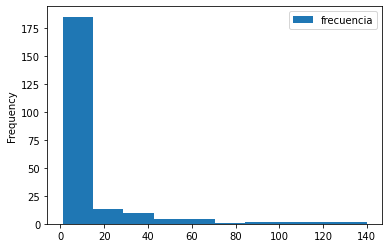

In [18]:
df_patrimonio_groupby = edades_bien.groupby("finalWorth")
df_patrimonio = df_patrimonio_groupby.agg(frecuencia=("finalWorth", "count"))

df_patrimonio.plot.hist()

 - Intervalo de confianza de algunas de las variables numéricas del dataset

In [19]:
patrimonio = edades_bien['finalWorth']

print('Los rangos son:', st.t.interval(alpha=0.80, df=len(patrimonio)-1, loc=np.mean(patrimonio), scale=st.sem(patrimonio)))

print('El intervalo de confianza para la variable "patrimonio" al 80% es de', np.mean(patrimonio))

Los rangos son: (4532.061309504381, 5070.843415514984)
El intervalo de confianza para la variable "patrimonio" al 80% es de 4801.452362509683


EJERCICIO 2: Interpretación de los resultados.
 - Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo incapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Con el histograma podemos observar que los datos están muy sesgados hacia la izquierda. La media de patrimonio es de 4762 miles de millones teniendo un intervalo de confianza del 80%. Las personas a la cabeza de la lista de alejan muchísimo más de la media con respecto a los que están al final de la lista. La gran mayoría están en el rango (1000 - 21000].